# **DATA CLEANING**
*A notebook to clean the scraped data*

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Disable warnings
import warnings
warnings.filterwarnings('ignore')

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import json
import pandas as pd
import numpy as np
import os
PRJ_ROOT_DIR = os.path.dirname(os.path.abspath(''))

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns

In [2]:
# Where to save the figures
NOTE_ROOT_DIR = os.path.abspath('')
CHAPTER_ID = "01_data_cleaning"
IMAGES_PATH = os.path.join(NOTE_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## **1 - Load the Data**

### 1.1 - EPL Match

In [3]:
# Load EPL match data
df_match = pd.read_csv(os.path.join(PRJ_ROOT_DIR, "data", "tabular", "matches.csv"))
df_match.head()

,home/name,away/name,home/gk_0,home/df_0,home/df_1,home/df_2,home/df_3,home/df_4,home/mf_0,home/mf_1,...,away/mf_0,away/mf_1,away/mf_2,away/mf_3,away/mf_4,away/fw_0,away/fw_1,away/fw_2,home_result,season
0,West Ham United,Manchester City,37096,55459,166640,219924,81012.0,NaN,101537,57531,...,220566,61366,20664,NaN,NaN,103955,205651.0,103025.0,lose,2019/20
1,Tottenham Hotspur,Aston Villa,37915,38290,55605,173904,158534.0,NaN,157668,62974,...,122806,114283,85242,148508.0,193488.0,213345,NaN,NaN,win,2019/20
2,Liverpool,Norwich City,116535,171287,97032,122798,169187.0,NaN,116643,41733,...,193111,195546,71738,90440.0,78607.0,57127,NaN,NaN,win,2019/20
3,Burnley,Southampton,98747,68983,17761,51927,39487.0,NaN,40145,60586,...,40146,78056,101178,213482.0,NaN,84939,200439.0,83283.0,win,2019/20
4,Manchester United,Chelsea,51940,184667,95658,106760,214590.0,NaN,74208,176297,...,85955,91651,88894,49579.0,184341.0,173879,NaN,NaN,win,2019/20


**NOTE:** The numbers on the cells are the ID of EPL players that engaged in corresponding matches.

In [4]:
# 30 columns (2 for team name, 28 for positions)
df_match.columns 

Index(['home/name', 'away/name', 'home/gk_0', 'home/df_0', 'home/df_1',
       'home/df_2', 'home/df_3', 'home/df_4', 'home/mf_0', 'home/mf_1',
       'home/mf_2', 'home/mf_3', 'home/mf_4', 'home/fw_0', 'home/fw_1',
       'home/fw_2', 'away/gk_0', 'away/df_0', 'away/df_1', 'away/df_2',
       'away/df_3', 'away/mf_0', 'away/mf_1', 'away/mf_2', 'away/mf_3',
       'away/mf_4', 'away/fw_0', 'away/fw_1', 'away/fw_2', 'home_result',
       'season'],
      dtype='object')

**NOTE:** Each team will have 14 columns to describe players in position, which is different from usual 11 positions. We explored that there are different line-ups arranged (about 7) during over 1000 matches of EPL.

1.  1-3-4-3 represents 1 Goalkeeper, 3 Defenders, 4 Midfielders and 3 Forwards
2. 1-3-5-2 represents 1 Goalkeeper, 3 Defenders, 5 Midfielders and 2 Forwards
3. 1-4-3-3 represents 1 Goalkeeper, 4 Defenders, 3 Midfielders and 3 Forwards
4. 1-4-4-2 represents 1 Goalkeeper, 4 Defenders, 4 Midfielders and 2 Forwards
5. 1-4-5-1 represents 1 Goalkeeper, 4 Defenders, 4 Midfielders and 2 Forwards
6. 1-5-3-2 represents 1 Goalkeeper, 5 Defenders, 3 Midfielders and 2 Forwards
7. 1-5-4-1 represents 1 Goalkeeper, 5 Defenders, 4 Midfielders and 1 Forwards

In order to satisfy all of the possible tactical line-ups selected in matches, we decide to provide 28 places for players that assigns maximum places for each position in a team which means one place for Goalkeeper, five places for Defenders, five places for Midfielders and three places for Forwards.

In [5]:
# Inspect the field of the columns 
df_match.info() # home_result - target: will be encoded

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1285 entries, 0 to 1284
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   home/name    1285 non-null   object 
 1   away/name    1285 non-null   object 
 2   home/gk_0    1285 non-null   int64  
 3   home/df_0    1285 non-null   int64  
 4   home/df_1    1285 non-null   int64  
 5   home/df_2    1285 non-null   int64  
 6   home/df_3    1006 non-null   float64
 7   home/df_4    57 non-null     float64
 8   home/mf_0    1285 non-null   int64  
 9   home/mf_1    1285 non-null   int64  
 10  home/mf_2    1285 non-null   int64  
 11  home/mf_3    998 non-null    float64
 12  home/mf_4    535 non-null    float64
 13  home/fw_0    1285 non-null   int64  
 14  home/fw_1    816 non-null    float64
 15  home/fw_2    443 non-null    float64
 16  away/gk_0    1285 non-null   int64  
 17  away/df_0    1285 non-null   int64  
 18  away/df_1    1285 non-null   int64  
 19  away/d

### 1.2 - EPL Player

In [4]:
# Load EPL player data
df_player = pd.read_json(os.path.join(PRJ_ROOT_DIR, "data", "scraping", "players.jsonl"), lines=True)
df_player.head(5)

,id,name,season,defence_clean sheets,defence_goals conceded,defence_tackles,defence_tackle success %,defence_last man tackles,defence_blocked shots,defence_interceptions,...,attack_hit woodwork,attack_big chances missed,goalkeeping_saves,goalkeeping_penalties saved,goalkeeping_punches,goalkeeping_high claims,goalkeeping_catches,goalkeeping_sweeper clearances,goalkeeping_throw outs,goalkeeping_goal kicks
0,p54861,Christian Benteke,2018/19,0,0,5,0,0,5,0,...,2,6,0,0,0,0,0,0,0,0
1,p213405,Filip Benkovic,2018/19,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,p449926,Adrián Bernabé,2018/19,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,p182436,Ben Woodburn,2018/19,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,p100649,Bernard,2018/19,0,0,49,0,0,9,27,...,1,4,0,0,0,0,0,0,0,0


In [7]:
# The naming: group_index (54 columns)
df_player.columns 

Index(['id', 'name', 'season', 'defence_clean sheets',
       'defence_goals conceded', 'defence_tackles', 'defence_tackle success %',
       'defence_last man tackles', 'defence_blocked shots',
       'defence_interceptions', 'defence_clearances',
       'defence_headed clearance', 'defence_clearances off line',
       'defence_recoveries', 'defence_duels won', 'defence_duels lost',
       'defence_successful 50/50s', 'defence_aerial battles won',
       'defence_aerial battles lost', 'defence_own goals',
       'defence_errors leading to goal', 'teamplay_goals', 'teamplay_assists',
       'teamplay_passes', 'teamplay_passes per match',
       'teamplay_big chances created', 'teamplay_crosses',
       'teamplay_cross accuracy %', 'teamplay_through balls',
       'teamplay_accurate long balls', 'discipline_yellow cards',
       'discipline_red cards', 'discipline_fouls', 'discipline_offsides',
       'attack_goals', 'attack_goals per match', 'attack_headed goals',
       'attack_goals 

In [5]:
# Inspect the field of the columns 
df_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3939 entries, 0 to 3938
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              3939 non-null   object 
 1   name                            3939 non-null   object 
 2   season                          3939 non-null   object 
 3   defence_clean sheets            3939 non-null   int64  
 4   defence_goals conceded          3939 non-null   int64  
 5   defence_tackles                 3939 non-null   int64  
 6   defence_tackle success %        3939 non-null   int64  
 7   defence_last man tackles        3939 non-null   int64  
 8   defence_blocked shots           3939 non-null   int64  
 9   defence_interceptions           3939 non-null   int64  
 10  defence_clearances              3939 non-null   int64  
 11  defence_headed clearance        3939 non-null   int64  
 12  defence_clearances off line     39

**NOTE:** Some of performance indices are in the type of object/string, which is a fault of scraping. Therefore, the next step is to validate these fields and preserve the consistency of the data.

## 2 - Data Consistency

### **2.1 - EPL Match**

In [6]:
# Convert ID type to float64
df_match_clean = df_match.iloc[:, 2:-2].astype("float64")
df_match_clean[["home/name", "away/name", "home_result", "season"]] = df_match[["home/name", "away/name", "home_result", "season"]]
df_match_clean.head()

,home/gk_0,home/df_0,home/df_1,home/df_2,home/df_3,home/df_4,home/mf_0,home/mf_1,home/mf_2,home/mf_3,...,away/mf_2,away/mf_3,away/mf_4,away/fw_0,away/fw_1,away/fw_2,home/name,away/name,home_result,season
0,37096.0,55459.0,166640.0,219924.0,81012.0,NaN,101537.0,57531.0,86934.0,54102.0,...,20664.0,NaN,NaN,103955.0,205651.0,103025.0,West Ham United,Manchester City,lose,2019/20
1,37915.0,38290.0,55605.0,173904.0,158534.0,NaN,157668.0,62974.0,45268.0,231372.0,...,85242.0,148508.0,193488.0,213345.0,NaN,NaN,Tottenham Hotspur,Aston Villa,win,2019/20
2,116535.0,171287.0,97032.0,122798.0,169187.0,NaN,116643.0,41733.0,56979.0,NaN,...,71738.0,90440.0,78607.0,57127.0,NaN,NaN,Liverpool,Norwich City,win,2019/20
3,98747.0,68983.0,17761.0,51927.0,39487.0,NaN,40145.0,60586.0,433154.0,60551.0,...,101178.0,213482.0,NaN,84939.0,200439.0,83283.0,Burnley,Southampton,win,2019/20
4,51940.0,184667.0,95658.0,106760.0,214590.0,NaN,74208.0,176297.0,109322.0,156689.0,...,88894.0,49579.0,184341.0,173879.0,NaN,NaN,Manchester United,Chelsea,win,2019/20


**NOTE:** Some positions in the starting line-ups are empty. Unfortunately, `int64` does not support `NA` so that we change the type of the rest into `float64`, synchronizing the presentation type for variable ID.

In [10]:
# Check the unique season
df_match_clean["season"].unique()

array(['2019/20', '2020/21', '2021/22', '2022/23'], dtype=object)

In [11]:
# Check the unique teams involved
df_match_clean["home/name"].unique()

array(['West Ham United', 'Tottenham Hotspur', 'Liverpool', 'Burnley',
       'Manchester United', 'Leicester City', 'Bournemouth', 'Watford',
       'Crystal Palace', 'Newcastle United', 'Aston Villa', 'Arsenal',
       'Chelsea', 'Brighton and Hove Albion', 'Manchester City',
       'Everton', 'Norwich City', 'Sheffield United', 'Southampton',
       'Wolverhampton Wanderers', 'Leeds United', 'Fulham',
       'West Bromwich Albion', 'Brentford', 'Nottingham Forest'],
      dtype=object)

In [12]:
# Check the uniqueness (home/name + away/name + season)
def toset(df):
    return set(tuple(player) for player in df.values.tolist())
len(df_match_clean) == len(toset(df_match_clean[["home/name", "away/name", "season"]]))

True

In [13]:
# Check whether there is any team who never played as away
set(df_match_clean["home/name"].unique()) - set(df_match_clean["away/name"].unique())

set()

**NOTE:** Each team has to play a couple of matches with one certain team, which means a team should be both included in home and away list. Through the checking, no synonym is detected and the entries are consistent, preserving the above condition.

### **2.2 - EPL Player**

**CAUTION:** Some object-type columns (6) (e.g., passes) have irregular formats such as `'1,448'` which cannot be converted conveniently into float.

In [7]:
# Convert object-type columns into float64
df_player_obj_float = df_player.select_dtypes(include=['O']).iloc[:, 3:].replace(",", "", regex=True).astype("float64")
df_player_obj_float.head()

,defence_recoveries,defence_duels won,defence_duels lost,teamplay_passes,teamplay_crosses,teamplay_accurate long balls
0,0.0,0.0,0.0,241.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,806.0,51.0,0.0


In [8]:
# Convert all performance indices to float64
df_player_clean = df_player.select_dtypes(exclude=['O']).astype("float64")
df_player_clean[df_player_obj_float.columns] = df_player_obj_float
df_player_clean[["id", "name", "season"]] = df_player[["id", "name", "season"]]
df_player_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3939 entries, 0 to 3938
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   defence_clean sheets            3939 non-null   float64
 1   defence_goals conceded          3939 non-null   float64
 2   defence_tackles                 3939 non-null   float64
 3   defence_tackle success %        3939 non-null   float64
 4   defence_last man tackles        3939 non-null   float64
 5   defence_blocked shots           3939 non-null   float64
 6   defence_interceptions           3939 non-null   float64
 7   defence_clearances              3939 non-null   float64
 8   defence_headed clearance        3939 non-null   float64
 9   defence_clearances off line     3939 non-null   float64
 10  defence_successful 50/50s       3939 non-null   float64
 11  defence_aerial battles won      3939 non-null   float64
 12  defence_aerial battles lost     39

In [9]:
# Check the unique season
df_player_clean["season"].unique()

array(['2018/19', '2021/22', '2020/21', '2019/20'], dtype=object)

**NOTE:** Since the intention is to use player performance of the past to fill the current matches; therefore, the players are then scraped back one season.

In [10]:
# Check the uniqueness (id + season)
def toset(df):
    return set(tuple(player) for player in df.values.tolist())
len(df_player_clean) == len(toset(df_player_clean[["id", "season"]]))

True

### **2.3 - Multi-table Level**

**NOTE:** The ID of the match data is of `float64` while that of player data is of `object`. Therefore, the former will be converted to the same type of the latter.

In [11]:
# Convert ID of player data into float64
df_player_clean["id"] = df_player_clean["id"].str.strip("p").astype("float64")
df_player_clean.head()

,defence_clean sheets,defence_goals conceded,defence_tackles,defence_tackle success %,defence_last man tackles,defence_blocked shots,defence_interceptions,defence_clearances,defence_headed clearance,defence_clearances off line,...,goalkeeping_goal kicks,defence_recoveries,defence_duels won,defence_duels lost,teamplay_passes,teamplay_crosses,teamplay_accurate long balls,id,name,season
0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,14.0,11.0,0.0,...,0.0,0.0,0.0,0.0,241.0,1.0,0.0,54861.0,Christian Benteke,2018/19
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,213405.0,Filip Benkovic,2018/19
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,449926.0,Adrián Bernabé,2018/19
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,182436.0,Ben Woodburn,2018/19
4,0.0,0.0,49.0,0.0,0.0,9.0,27.0,12.0,2.0,0.0,...,0.0,0.0,0.0,0.0,806.0,51.0,0.0,100649.0,Bernard,2018/19


## 3 - Missing Data 

### 3.1 - EPL Match

Saving figure match_missing_distri


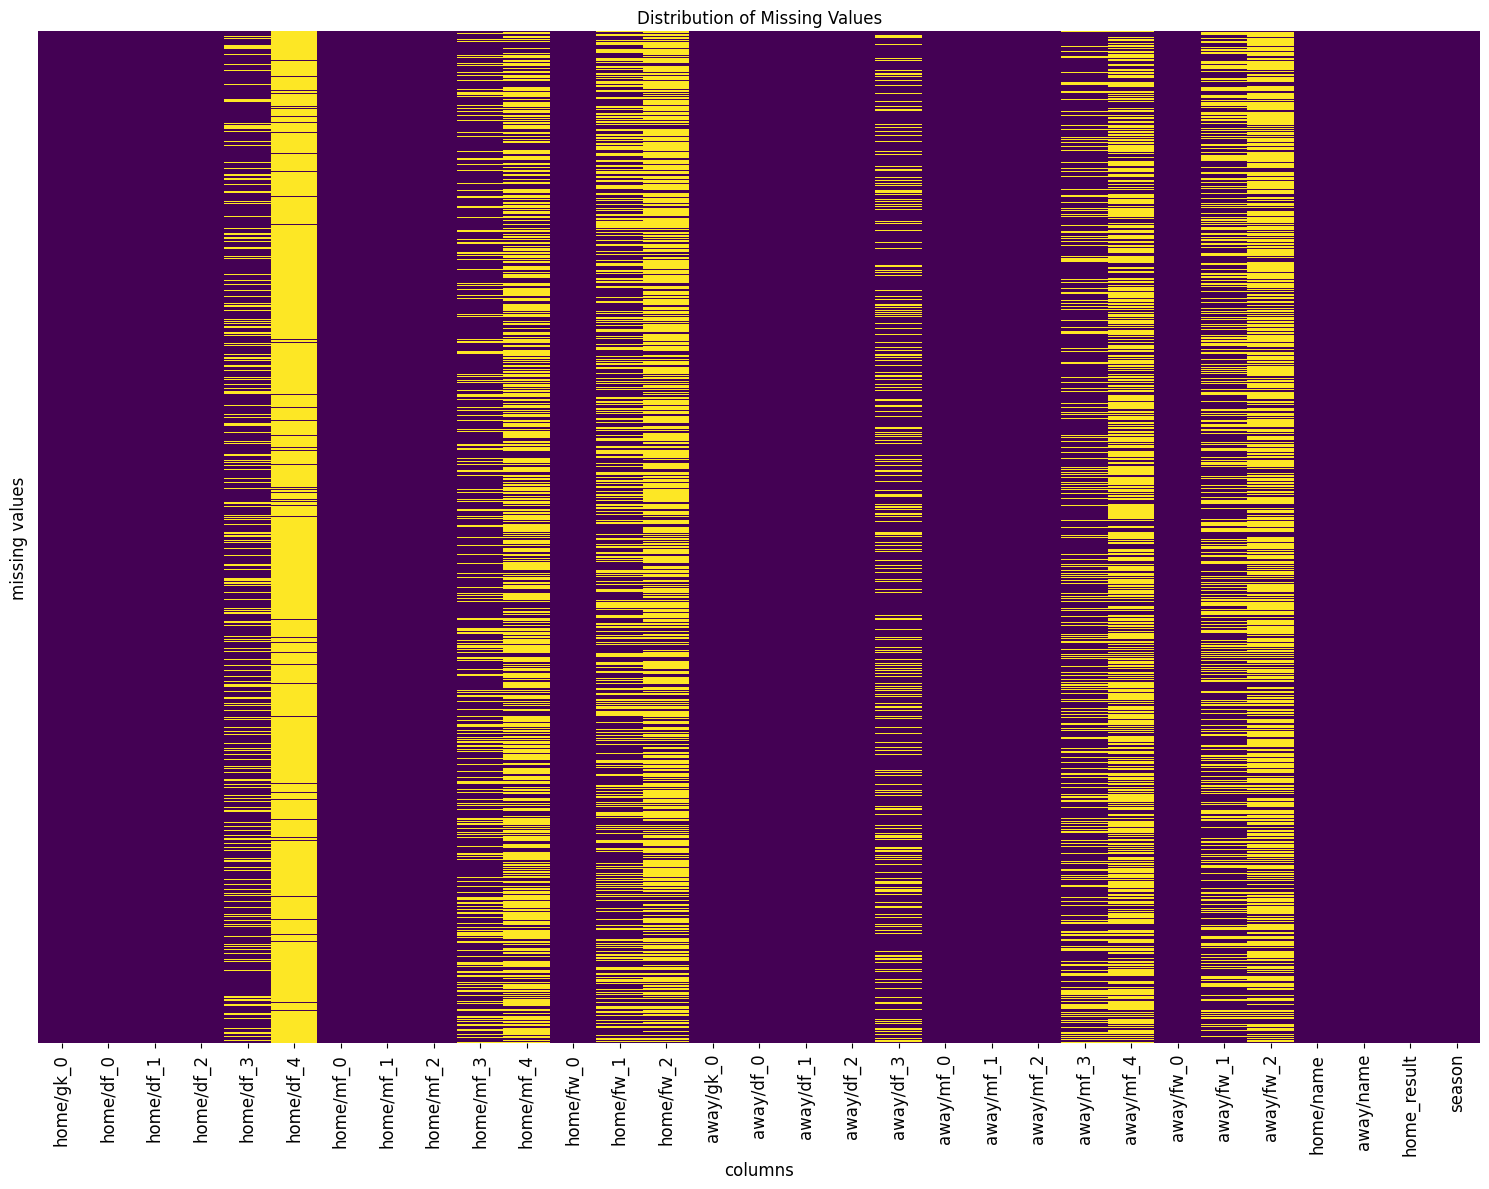

In [10]:
# Check data missing distribution
plt.figure(figsize=(15, 12))
msno = sns.heatmap(df_match_clean.isnull(), yticklabels=False, cbar=False, cmap = 'viridis')
msno.set_xlabel('columns', size=12)
msno.set_ylabel('missing values', size=12)
msno.set_title('Distribution of Missing Values', size=12)
plt.tight_layout()
save_fig("match_missing_distri")

In [11]:
# Calculate percentage of null values in each column
(df_match_clean.isnull().sum() / df_match_clean.isnull().count()).sort_values(ascending=False)

home/df_4      0.955642
home/fw_2      0.655253
away/fw_2      0.645914
away/mf_4      0.603891
home/mf_4      0.583658
home/fw_1      0.364981
away/fw_1      0.341634
away/df_3      0.234241
away/mf_3      0.228794
home/mf_3      0.223346
home/df_3      0.217121
away/mf_0      0.000000
away/fw_0      0.000000
home/name      0.000000
away/name      0.000000
home_result    0.000000
away/mf_2      0.000000
away/mf_1      0.000000
home/gk_0      0.000000
away/df_0      0.000000
away/df_2      0.000000
away/df_1      0.000000
home/df_0      0.000000
away/gk_0      0.000000
home/fw_0      0.000000
home/mf_2      0.000000
home/mf_1      0.000000
home/mf_0      0.000000
home/df_2      0.000000
home/df_1      0.000000
season         0.000000
dtype: float64

**NOTE:** Some positions have a lot of missing values (e.g., `home/df_4`), which results from either that the scraping step would not scrape them or teams in the corresponding matches not use line-ups having those positions (e.g., $5^{th}$ defender). Fortunately, the recheck showed the former.

### 3.2 - EPL PLayer

Saving figure player_missing_distri


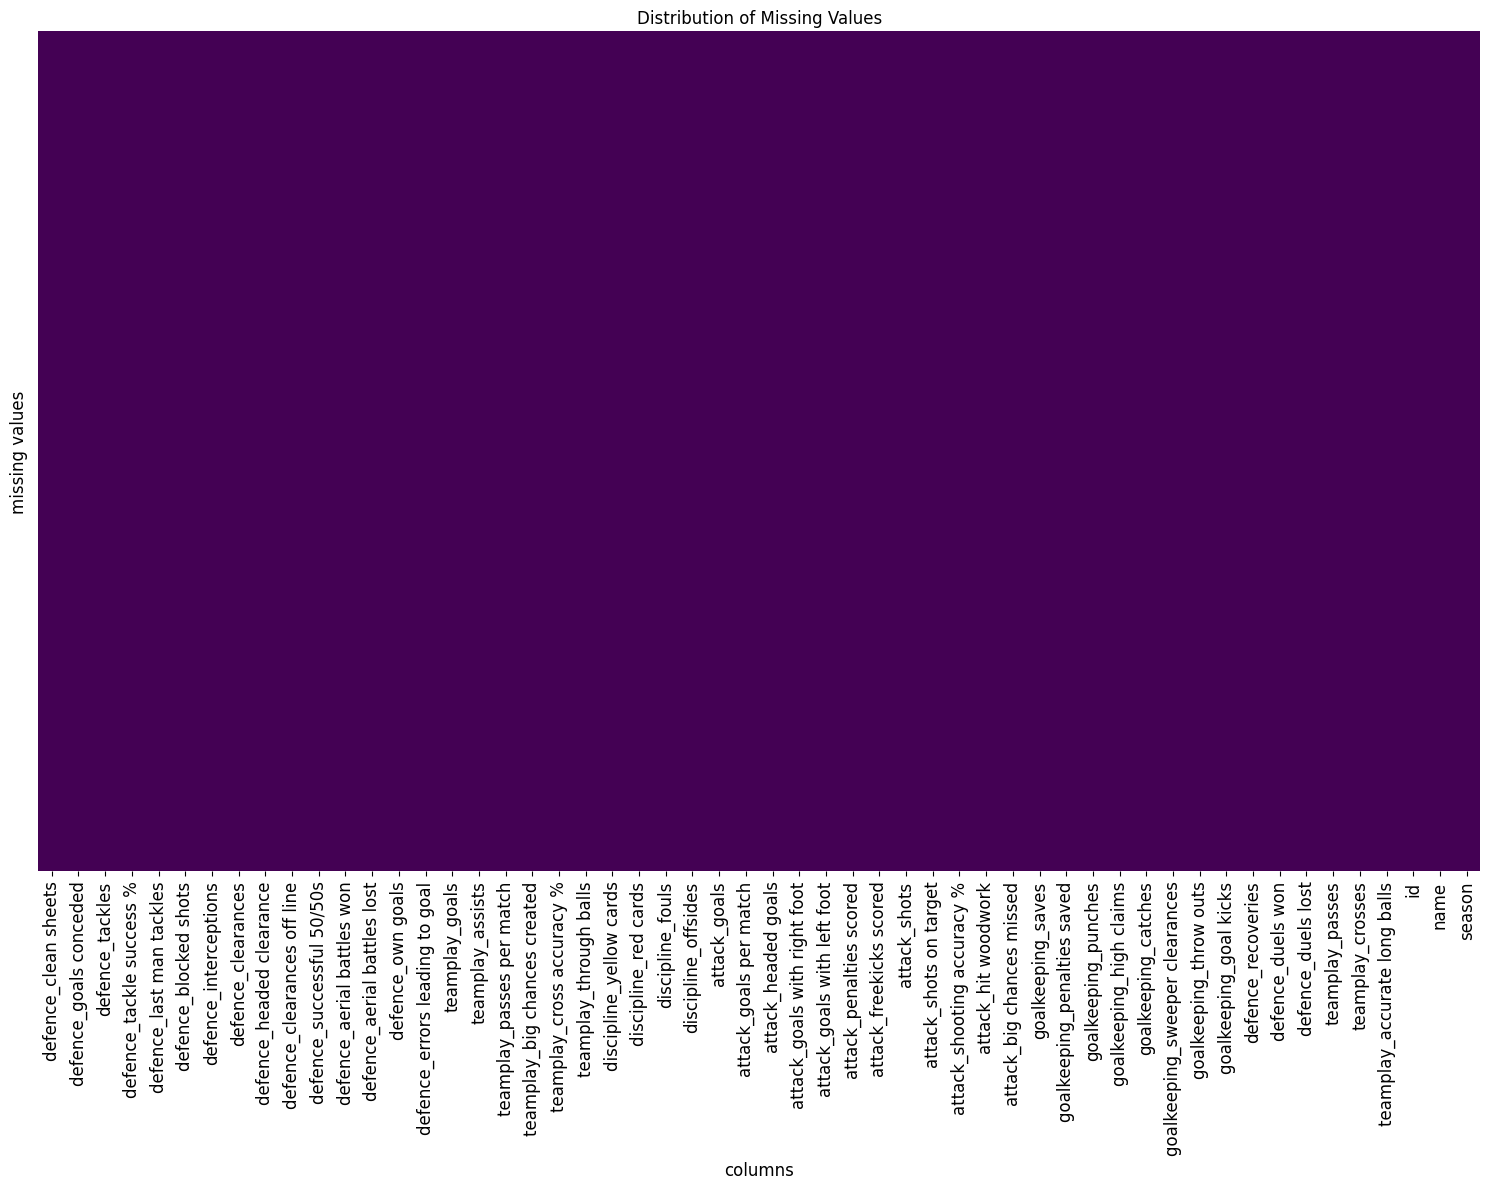

In [12]:
# Check data missing distribution
plt.figure(figsize=(15, 12))
msno = sns.heatmap(df_player_clean.isnull(), yticklabels=False, cbar=False, cmap = 'viridis')
msno.set_xlabel('columns', size=12)
msno.set_ylabel('missing values', size=12)
msno.set_title('Distribution of Missing Values', size=12)
plt.tight_layout()
save_fig("player_missing_distri")

In [13]:
# Calculate percentage of null values in each column
(df_player_clean.isnull().sum() / df_player_clean.isnull().count()).sort_values(ascending=False)

defence_clean sheets              0.0
goalkeeping_high claims           0.0
attack_goals with left foot       0.0
attack_penalties scored           0.0
attack_freekicks scored           0.0
attack_shots                      0.0
attack_shots on target            0.0
attack_shooting accuracy %        0.0
attack_hit woodwork               0.0
attack_big chances missed         0.0
goalkeeping_saves                 0.0
goalkeeping_penalties saved       0.0
goalkeeping_punches               0.0
goalkeeping_catches               0.0
defence_goals conceded            0.0
goalkeeping_sweeper clearances    0.0
goalkeeping_throw outs            0.0
goalkeeping_goal kicks            0.0
defence_recoveries                0.0
defence_duels won                 0.0
defence_duels lost                0.0
teamplay_passes                   0.0
teamplay_crosses                  0.0
teamplay_accurate long balls      0.0
id                                0.0
name                              0.0
attack_goals

### **3.3 - Multi-table Level**

In [53]:
# Some players included in match records are missing from player data
player_data = toset(df_player_clean[["id", "season"]])
players_in_match = set()
for column in df_match_clean.iloc[:, :-4].columns:
    players_in_match.update(list(zip(df_match_clean[df_match_clean["season"] != "2022/23"][column][df_match_clean[column].notnull()], df_match_clean["season"])))

missing_players = pd.DataFrame(list(players_in_match - player_data), columns=["id", "season"]).set_index(["id"])
missing_players.head()

,season
id,
204580.0,2019/20
184754.0,2019/20
184754.0,2020/21
208973.0,2020/21
446281.0,2019/20


In [54]:
# Load existing player URLs
with open(os.path.join(PRJ_ROOT_DIR, "data", "scraping", "url_players.jsonl"), "r") as f:
    player_urls = json.load(f)
df_url = pd.DataFrame(player_urls)
df_url["id"] = df_url["id"].str.lstrip("p").astype("float64")
df_url = df_url.set_index(["id"])
df_url.head()

,url,season,name
id,,,
173879.0,https://www.premierleague.com/players/13286/Ta...,2018/19,Tammy Abraham
159533.0,https://www.premierleague.com/players/4979/Ada...,2018/19,Adama Traoré
109646.0,https://www.premierleague.com/players/13549/To...,2018/19,Tosin Adarabioyo
60706.0,https://www.premierleague.com/players/4852/Adr...,2018/19,Adrián
46483.0,https://www.premierleague.com/players/11357/Ad...,2018/19,Adrien Silva


In [55]:
# Merge corresponding URLs and names to the missing players
missing_players["url"] = df_url[~df_url.index.duplicated(keep='first')]["url"]
missing_players["name"] = df_url[~df_url.index.duplicated(keep='first')]["name"]
missing_players = missing_players.reset_index()
missing_players["id"] = "p" + missing_players["id"].astype("int64").astype("str")
missing_players

,id,season,url,name
0,p204580,2019/20,https://www.premierleague.com/players/23194/Vi...,Vitaly Janelt
1,p184754,2019/20,https://www.premierleague.com/players/20337/Hw...,Hwang Hee-Chan
2,p184754,2020/21,https://www.premierleague.com/players/20337/Hw...,Hwang Hee-Chan
3,p208973,2020/21,https://www.premierleague.com/players/72119/Fr...,Francisco Sierralta
4,p446281,2019/20,https://www.premierleague.com/players/35741/To...,Tony Springett
...,...,...,...,...
198,p244560,2020/21,https://www.premierleague.com/players/21495/Ro...,Romain Perraud
199,p189627,2019/20,https://www.premierleague.com/players/19591/Di...,Dimitris Giannoulis
200,p19194,2019/20,https://www.premierleague.com/players/2912/Dav...,David Martin
201,p169528,2019/20,https://www.premierleague.com/players/14624/An...,Antonee Robinson


In [58]:
# Save those URLs for re-scrape
with open(os.path.join(PRJ_ROOT_DIR, "data", "scraping", "urls_missing.jsonl"), "w") as f:
    json.dump(json.loads(missing_players.to_json(orient="records")), f)

**CAUTION:** The missing data has been re-scraped and the notebook rerun from this point (except for this section). Therefore, the results of cells in this section are of the initial scraped data.

In [14]:
# Recheck whether there is any players that are not included
player_data = toset(df_player_clean[["id", "season"]])
players_in_match = set()
for column in df_match_clean.iloc[:, :-4].columns:
    players_in_match.update(list(zip(df_match_clean[df_match_clean["season"] != "2022/23"][column][df_match_clean[column].notnull()], df_match_clean["season"])))

missing_players = pd.DataFrame(list(players_in_match - player_data), columns=["id", "season"]).set_index(["id"])
len(missing_players)

0

## 4 - Noisy Data
Since the match data just consists of player IDs, then it is not statistical. We will spend this section on observing the player data solely.

Saving figure player_box_plot_features


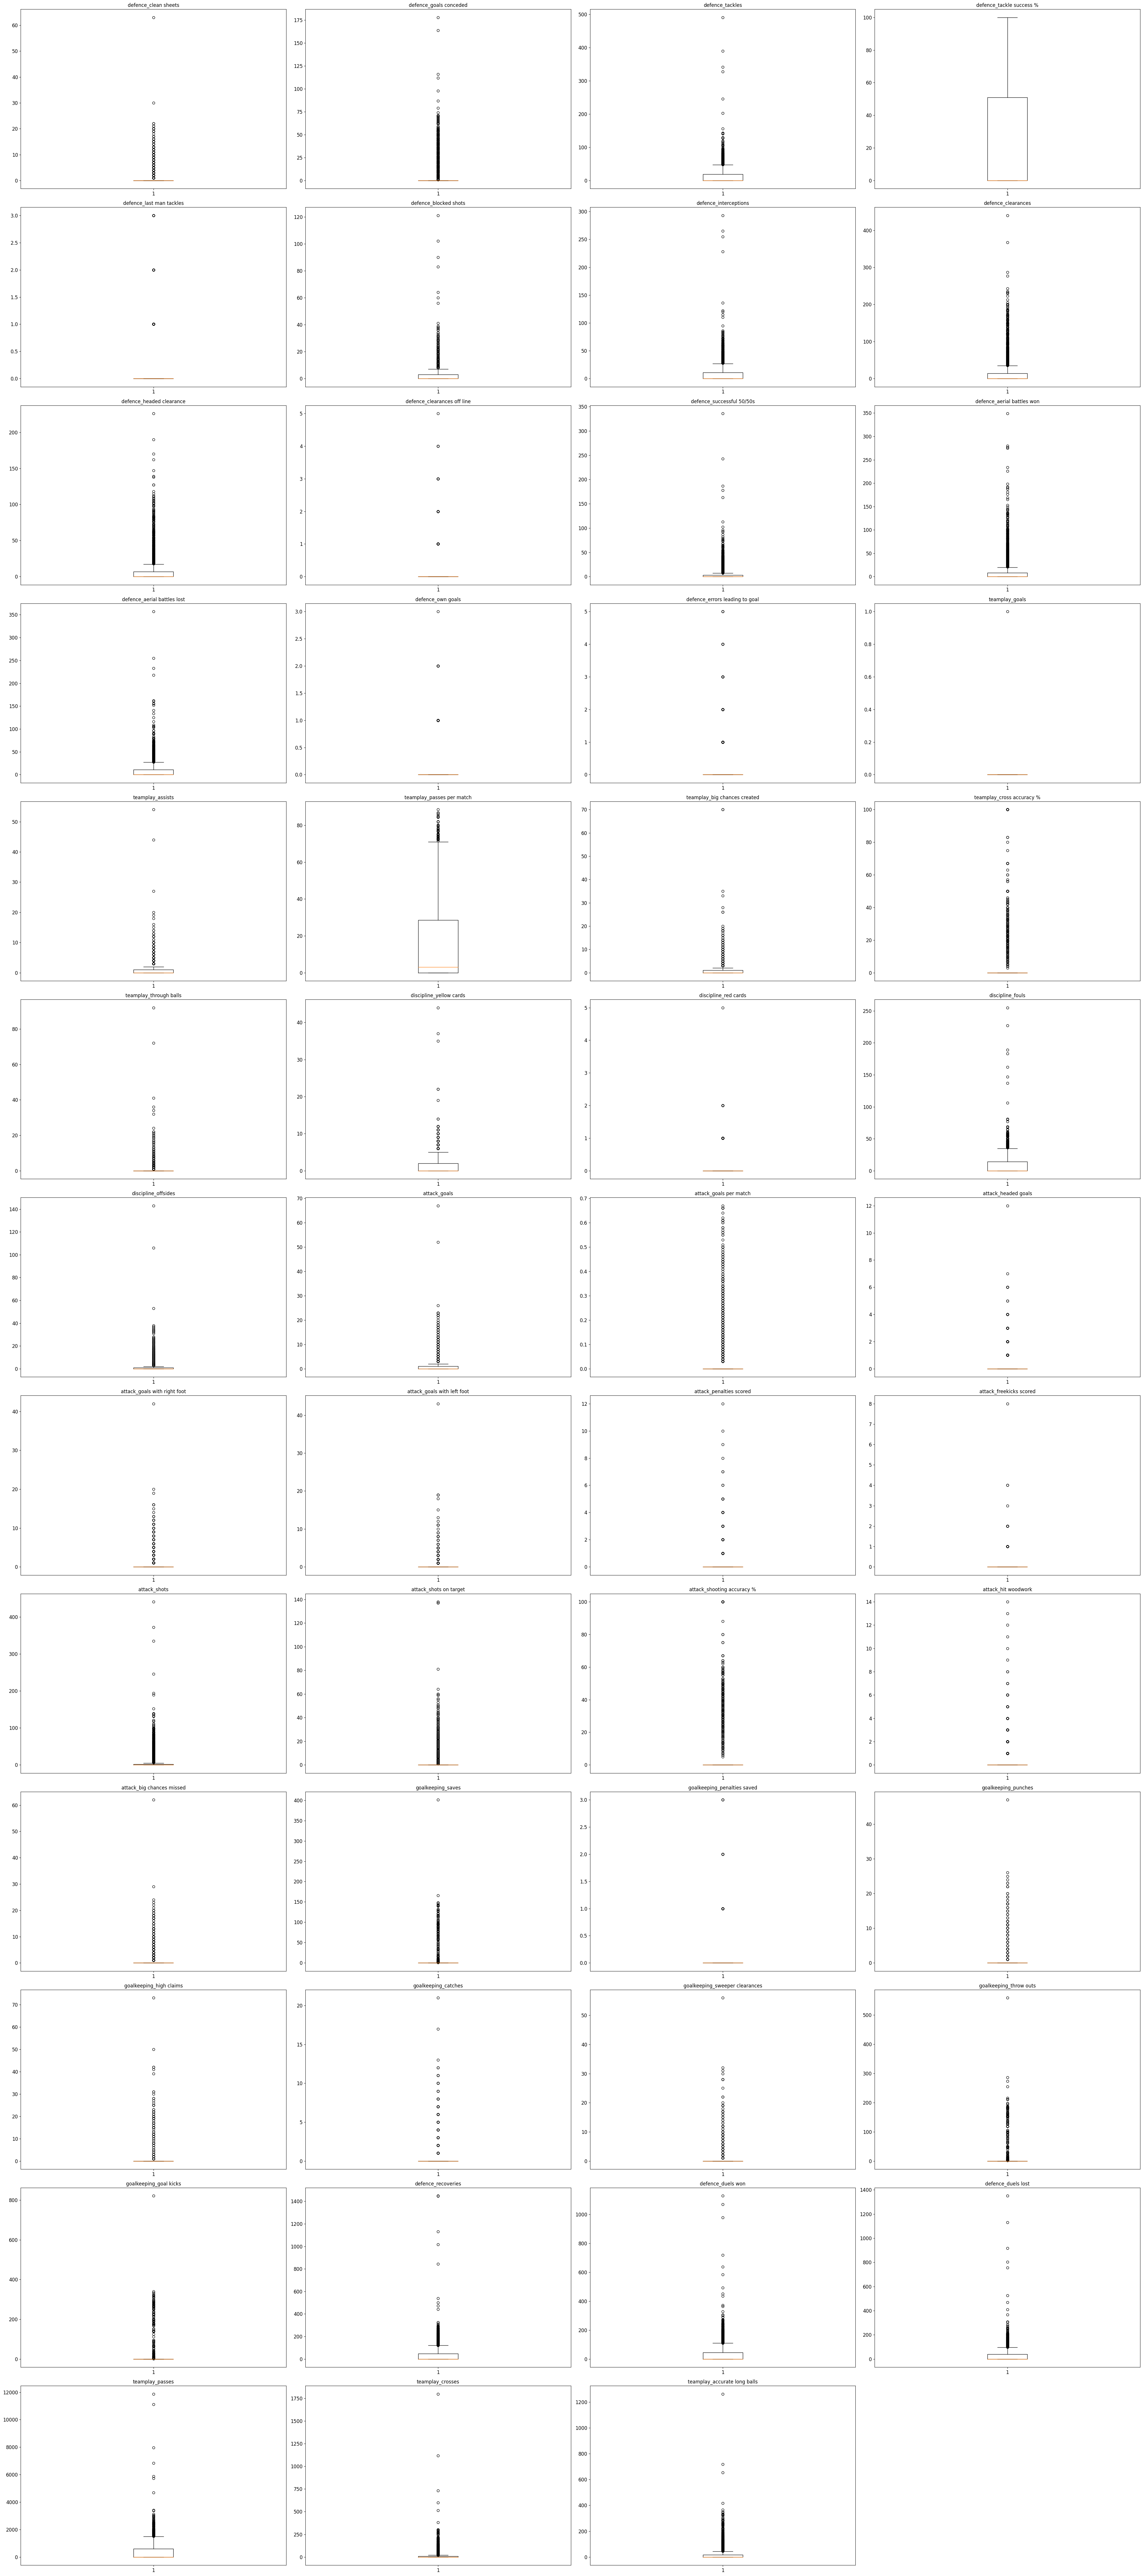

In [15]:
# Visualize the outliers using box plot
plt.figure(figsize=(40, 90))
i = 1
for column in df_player_clean.iloc[:, :-3].columns:
    plt.subplot(13, 4, i)
    plt.boxplot(df_player_clean[column], whis=1.5)
    plt.title(column)
    i += 1
plt.tight_layout()
save_fig("player_box_plot_features")

In [16]:
# Calculate number of univariate outliners and its percentage based on IQR mathematical formula
whis = 1.5
outlier_df = pd.DataFrame(columns=["number", "percentage", "upper_quantile", "lower_quantile"], 
                          index=df_player_clean.iloc[:, :-3].columns)

for column in df_player_clean.iloc[:, :-3].columns:
    q75, q25 = np.percentile(df_player_clean[column], [75, 25])
    IQR = q75 - q25
    upper = q75 + (IQR * whis)
    lower = q25 - (IQR * whis)
    outlier_df.loc[column, "upper_quantile"] = upper
    outlier_df.loc[column, "lower_quantile"] = lower
    outlier_df.loc[column, "number"] = len(np.where((df_player_clean[column] > upper) | (df_player_clean[column] < lower))[0])
    outlier_df.loc[column, "percentage"] = len(np.where((df_player_clean[column] > upper) | (df_player_clean[column] < lower))[0]) * 100 / len(df_player_clean)
    
outlier_df.sort_values(by=["number", "percentage"], ascending=False)

,number,percentage,upper_quantile,lower_quantile
attack_shots on target,971,24.650927,0.0,0.0
attack_shooting accuracy %,971,24.650927,0.0,0.0
teamplay_cross accuracy %,969,24.600152,0.0,0.0
attack_shots,892,22.645341,5.0,-3.0
defence_goals conceded,836,21.223661,0.0,0.0
attack_goals per match,760,19.294237,0.0,0.0
defence_successful 50/50s,739,18.761107,7.5,-4.5
attack_goals with right foot,736,18.684945,0.0,0.0
teamplay_through balls,725,18.405687,0.0,0.0
attack_big chances missed,714,18.126428,0.0,0.0


In [17]:
# Check some extreme cases of attack shooting accuracy
df_player_clean[df_player_clean["attack_shooting accuracy %"] == 100].head()

,defence_clean sheets,defence_goals conceded,defence_tackles,defence_tackle success %,defence_last man tackles,defence_blocked shots,defence_interceptions,defence_clearances,defence_headed clearance,defence_clearances off line,...,goalkeeping_goal kicks,defence_recoveries,defence_duels won,defence_duels lost,teamplay_passes,teamplay_crosses,teamplay_accurate long balls,id,name,season
39,0.0,0.0,2.0,50.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,6.0,8.0,14.0,36.0,2.0,0.0,446281.0,Tony Springett,2021/22
183,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,56.0,6.0,0.0,436234.0,Bryan Gil,2021/22
188,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,6.0,1.0,0.0,154138.0,Tariqe Fosu-Henry,2021/22
418,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,63.0,0.0,0.0,493250.0,Amad Diallo,2020/21
517,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,1.0,1.0,0.0,0.0,203389.0,Nathan Tella,2019/20


**NOTE:** The player performance seems to spread out a lot. However, the data here tells the truth and we found no mistake of data in extreme cases. For example, `Tony Springett` in season 2021/22 has 100% shooting accuracy, but he just played less games (3 appearances across the whole season) and as a midfielder, he made a small number of shooting. Therefore, his shooting accuracy was able to reach 100%. 

We will leave the outliers there since there is no systematic errors. In specific tasks (e.g., machine learning), we will exclude "irregular" records if necessary.

## 5 - Redundant Data
Since the match data just consists of player IDs, then it is not statistical. We will spend this section on observing the player data solely.

**NOTE:** This step will exclude (or combine) some features of players to produce less sparse and dimensional data. However, we will need to explore the data first (`02_exploratory_data_analysis`) for deeper insights in order to obtain qualified axes representing player performance.

## **6 - Save the Work**

In [18]:
# Where to save dataframe
def save_df(df, path, extension="csv", index=False):
    df.to_csv(path, index=index)

### 6.1 - The Raw Data

In [19]:
# Save player data
save_df(df_player, os.path.join(PRJ_ROOT_DIR, "data", "tabular", "players.csv"))

In [20]:
# Save match data
save_df(df_match, os.path.join(PRJ_ROOT_DIR, "data", "tabular", "matches.csv"))

### 6.2 - The Clean Data

In [21]:
# Save player data
columns = []
for i in range(len(df_player_clean.columns)):
    columns.append(df_player_clean.columns[i].replace("_", "/").replace(" ", "_"))
df_player_clean.columns = columns
save_df(df_player_clean, os.path.join(PRJ_ROOT_DIR, "data", "tabular", "clean", "players.csv"))

In [22]:
# Save match data
save_df(df_match_clean, os.path.join(PRJ_ROOT_DIR, "data", "tabular", "clean", "matches.csv"))